In [1]:
import pandas as pd
import numpy as np

In [2]:
zip_to_fips = pd.read_csv(r'C:\Users\zhang\Box\Air permit\ZIP_COUNTY_032020.csv')
region_2 = pd.read_excel(r'C:\Users\zhang\Box\Air permit\Region_2.xlsx')

In [3]:
NAICS_2002 = pd.read_excel(r'C:\Users\zhang\Box\Air permit\NY\1987_SIC_to_2002_NAICS.xlsx')
NAICS_2007 = pd.read_excel(r'C:\Users\zhang\Box\Air permit\NY\2002NAICS_to_2007NAICS.xlsx')
NAICS_2012 = pd.read_excel(r'C:\Users\zhang\Box\Air permit\NY\2007NAICS_to_2012NAICS.xlsx')
NAICS_2017 = pd.read_excel(r'C:\Users\zhang\Box\Air permit\NY\2012NAICS_to_2017NAICS.xlsx')

In [4]:
zip_to_fips = zip_to_fips.rename(columns={'COUNTY':'FIPS'}).drop(
    columns=['RES_RATIO','BUS_RATIO','OTH_RATIO','TOT_RATIO'])

zip_to_fips['FIPS'] = zip_to_fips.FIPS.astype(str).str[:5].str.zfill(5)
zip_to_fips['ZIP'] = zip_to_fips.ZIP.astype(str).str[:5].str.zfill(5)

In [5]:
region_2.ZIP.dtype

dtype('int64')

In [6]:
region_2['ZIP'] = region_2.ZIP.astype(str).str[:5].str.zfill(5)
region_2_fips = region_2.merge(zip_to_fips,how="inner",on=['ZIP'])

In [7]:
region_2_fips

,FACILITY_NAME,COUNTY_FIPS,COUNTY,ZIP,NAICS,SIC,Description,REPORTING_YEAR,UNIT_NAME,FUEL_TYPE,FUEL_QUANTITY,FUEL_QUANTITY_UOM,Maxmum gross heat input,Unit,FIPS
0,STEINWAY & SONS,NaN,NaN,11105,NaN,3931.0,NaN,2017.0,FST-600,No. 2 fuel oil and natural gas,NaN,NaN,24.20,MMBtu/hr,36081
1,STEINWAY & SONS,NaN,NaN,11105,NaN,3931.0,NaN,2017.0,"Cleaver Brooks, SB600-600",No. 2 fuel oil and natural gas,NaN,NaN,25.20,MMBtu/hr,36081
2,CHEMPRENE INC,NaN,NaN,12508,NaN,3052.0,NaN,2016.0,00B01,natural gas or No.4 fuel oil,NaN,NaN,20.92,MMBtu/hr,36027
3,CHEMPRENE INC,NaN,NaN,12508,NaN,3052.0,NaN,2016.0,00B02,natural gas or No.4 fuel oil,NaN,NaN,20.92,MMBtu/hr,36027
4,GLOBALFOUNDRIES US 2 LLC,NaN,NaN,12533,NaN,3471.0,NaN,2017.0,NaN,natural gas,NaN,NaN,72.00,MMBtu/hr,36079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,"Mars Wrigley Confectionery US, LLC",NaN,NaN,07840,311352.0,NaN,NaN,2019.0,High pressure boiler 4,Natural gas,NaN,NaN,45.00,mmBtu/hr,34041
299,"Mars Wrigley Confectionery US, LLC",NaN,NaN,07840,311352.0,NaN,NaN,2019.0,High pressure boiler 4,Natural gas,NaN,NaN,45.00,mmBtu/hr,34027
300,DSM NUTRITIONAL PRODUCTS LLC,NaN,NaN,07823,325411.0,NaN,NaN,2019.0,TMP BLR: NG,Natural gas,NaN,NaN,94.70,mmBtu/hr,34041
301,DSM NUTRITIONAL PRODUCTS LLC,NaN,NaN,07823,325411.0,NaN,NaN,2019.0,Boiler 2,Natural gas,NaN,NaN,231.00,mmBtu/hr,34041


In [8]:
region_2_fips_sic = region_2_fips[region_2_fips['SIC'].notnull()]
region_2_fips_naics = region_2_fips[region_2_fips['NAICS'].notnull()]

In [13]:
region_2_fips_sic

,FACILITY_NAME,COUNTY_FIPS,COUNTY,ZIP,NAICS,SIC,Description,REPORTING_YEAR,UNIT_NAME,FUEL_TYPE,FUEL_QUANTITY,FUEL_QUANTITY_UOM,Maxmum gross heat input,Unit,FIPS
0,STEINWAY & SONS,NaN,NaN,11105,NaN,3931.0,NaN,2017.0,FST-600,No. 2 fuel oil and natural gas,NaN,NaN,24.20,MMBtu/hr,36081
1,STEINWAY & SONS,NaN,NaN,11105,NaN,3931.0,NaN,2017.0,"Cleaver Brooks, SB600-600",No. 2 fuel oil and natural gas,NaN,NaN,25.20,MMBtu/hr,36081
2,CHEMPRENE INC,NaN,NaN,12508,NaN,3052.0,NaN,2016.0,00B01,natural gas or No.4 fuel oil,NaN,NaN,20.92,MMBtu/hr,36027
3,CHEMPRENE INC,NaN,NaN,12508,NaN,3052.0,NaN,2016.0,00B02,natural gas or No.4 fuel oil,NaN,NaN,20.92,MMBtu/hr,36027
4,GLOBALFOUNDRIES US 2 LLC,NaN,NaN,12533,NaN,3471.0,NaN,2017.0,NaN,natural gas,NaN,NaN,72.00,MMBtu/hr,36079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,3M CO,NaN,NaN,14150,NaN,2821.0,NaN,2007.0,NaN,No.2 oil,NaN,NaN,60.40,MMBtu/hr,36029
120,3M CO,NaN,NaN,14150,NaN,2821.0,NaN,2007.0,NaN,natural gas,NaN,NaN,63.20,MMBtu/hr,36029
121,"DUPONT SPECIALTY PRODUCTS USA, LLC",NaN,NaN,14207,NaN,3081.0,NaN,2015.0,NaN,NaN,NaN,NaN,3.00,MMBtu/hr,36029
122,GENERAL MOTORS LLC,NaN,NaN,14207,NaN,3714.0,NaN,2016.0,NaN,natural gas,NaN,NaN,10.50,MMBtu/hr,36029


In [9]:
region_2_fips = region_2_fips.rename(columns = {'Maxmum gross heat input':'Input_Capacity'}).drop(columns=['COUNTY_FIPS'])

In [10]:
max_value = region_2_fips['Input_Capacity'].max()
min_value = region_2_fips['Input_Capacity'].min()
print(max_value, min_value)

855.0 0.146


Text(0, 0.5, 'Number of boilers')

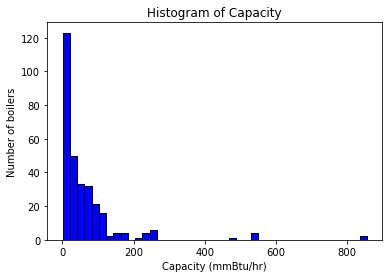

In [30]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(region_2_fips['Input_Capacity'], color = 'blue', edgecolor = 'black',
         bins = int((max_value - min_value)/20))

# seaborn histogram
sns.distplot(region_2_fips['Input_Capacity'], hist=True, kde=False, 
             bins=int((max_value - min_value)/20), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Capacity')
plt.xlabel('Capacity (mmBtu/hr)')
plt.ylabel('Number of boilers')

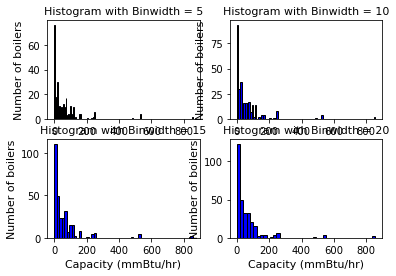

In [12]:
# Show 4 different binwidths
for i, binwidth in enumerate([5, 10, 15,20]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(region_2_fips['Input_Capacity'], bins = int((max_value - min_value)/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 11)
    ax.set_xlabel('Capacity (mmBtu/hr)', size = 11)
    ax.set_ylabel('Number of boilers', size= 11)

plt.show()

In [14]:
region_2_fips_sic['SIC'] = region_2_fips_sic['SIC'].astype(str).str[:4]
T1 = pd.DataFrame(NAICS_2002, columns = ['SIC', 'NAICS_2002'])
T1[["SIC"]] = T1[["SIC"]].astype(str)
T2 = pd.DataFrame(NAICS_2007, columns = ['NAICS_2002','NAICS_2007'])
T2[["NAICS_2002"]] = T2[["NAICS_2002"]].astype(str)
T2[["NAICS_2007"]] = T2[["NAICS_2007"]].astype(str)
T3 = pd.DataFrame(NAICS_2012, columns = ['NAICS_2007','NAICS_2012'])
T3[["NAICS_2007"]] = T3[["NAICS_2007"]].astype(str)
T3[["NAICS_2012"]] = T3[["NAICS_2012"]].astype(str)
T4 = pd.DataFrame(NAICS_2017, columns = ['NAICS_2012','NAICS_2017','NAICS_SECTOR'])
T4[["NAICS_2012"]] = T4[["NAICS_2012"]].astype(str)
T4[["NAICS_2017"]] = T4[["NAICS_2017"]].astype(str)
T4[["NAICS_SECTOR"]] = T4[["NAICS_SECTOR"]].astype(str)

C:\Users\zhang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
# Convet SIC type to string
region_2_T1 = pd.merge(region_2_fips_sic, T1, how='left', on=['SIC'])
region_2_T1['NAICS_2002'] = region_2_T1['NAICS_2002'].astype(str)
region_2_T2 = pd.merge(region_2_T1, T2, how='left', on=['NAICS_2002'])
region_2_T2['NAICS_2007'] = region_2_T2['NAICS_2007'].astype(str)
region_2_T3 = pd.merge(region_2_T2, T3, how='left', on=['NAICS_2007'])
region_2_T3['NAICS_2012'] = region_2_T3['NAICS_2012'].astype(str)
region_2_T4 = pd.merge(region_2_T3, T4, how='left', on=['NAICS_2012'])
region_2_T4['NAICS_2017'] = region_2_T4['NAICS_2017'].astype(str)
region_2_T4

,FACILITY_NAME,COUNTY_FIPS,COUNTY,ZIP,NAICS,SIC,Description,REPORTING_YEAR,UNIT_NAME,FUEL_TYPE,FUEL_QUANTITY,FUEL_QUANTITY_UOM,Maxmum gross heat input,Unit,FIPS,NAICS_2002,NAICS_2007,NAICS_2012,NAICS_2017,NAICS_SECTOR
0,STEINWAY & SONS,NaN,NaN,11105,NaN,3931,NaN,2017.0,FST-600,No. 2 fuel oil and natural gas,NaN,NaN,24.20,MMBtu/hr,36081,339992,339992,339992,339992,Musical Instrument Manufacturing
1,STEINWAY & SONS,NaN,NaN,11105,NaN,3931,NaN,2017.0,"Cleaver Brooks, SB600-600",No. 2 fuel oil and natural gas,NaN,NaN,25.20,MMBtu/hr,36081,339992,339992,339992,339992,Musical Instrument Manufacturing
2,CHEMPRENE INC,NaN,NaN,12508,NaN,3052,NaN,2016.0,00B01,natural gas or No.4 fuel oil,NaN,NaN,20.92,MMBtu/hr,36027,326220,326220,326220,326220,Rubber and Plastics Hoses and Belting Manufact...
3,CHEMPRENE INC,NaN,NaN,12508,NaN,3052,NaN,2016.0,00B02,natural gas or No.4 fuel oil,NaN,NaN,20.92,MMBtu/hr,36027,326220,326220,326220,326220,Rubber and Plastics Hoses and Belting Manufact...
4,GLOBALFOUNDRIES US 2 LLC,NaN,NaN,12533,NaN,3471,NaN,2017.0,NaN,natural gas,NaN,NaN,72.00,MMBtu/hr,36079,332813,332813,332813,332813,"Electroplating, Plating, Polishing, Anodizing,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,GENERAL MOTORS LLC,NaN,NaN,14207,NaN,3714,NaN,2016.0,NaN,natural gas,NaN,NaN,10.50,MMBtu/hr,36029,336322,336322,336320,336320,Motor Vehicle Electrical and Electronic Equipm...
211,GENERAL MOTORS LLC,NaN,NaN,14207,NaN,3714,NaN,2016.0,NaN,natural gas,NaN,NaN,10.50,MMBtu/hr,36029,336330,336330,336330,336330,Motor Vehicle Steering and Suspension Componen...
212,GENERAL MOTORS LLC,NaN,NaN,14207,NaN,3714,NaN,2016.0,NaN,natural gas,NaN,NaN,10.50,MMBtu/hr,36029,336340,336340,336340,336340,Motor Vehicle Brake System Manufacturing
213,GENERAL MOTORS LLC,NaN,NaN,14207,NaN,3714,NaN,2016.0,NaN,natural gas,NaN,NaN,10.50,MMBtu/hr,36029,336350,336350,336350,336350,Motor Vehicle Transmission and Power Train Par...


In [26]:
# plot capacity population in different industries
region_2_T4 = region_2_T4.drop(columns=['NAICS','NAICS_2002','NAICS_2007','NAICS_2012'])
region_2_T4 = region_2_T4.rename(columns = {'Maxmum gross heat input':'Input_Capacity','NAICS_2017':'NAICS'})
region_2_T4['NAICS'] = region_2_T4['NAICS'].astype(str).str[:3]
region_2_fips_naics = region_2_fips_naics.rename(columns = {'Maxmum gross heat input':'Input_Capacity'})
region_2_fips_naics['NAICS'] = region_2_fips_naics['NAICS'].astype(str).str[:3]

region_2_overall = pd.concat([region_2_T4, region_2_fips_naics])
print (region_2_overall['NAICS'].unique())

['339' '326' '332' '324' '331' '325' '311' '334' '333' '322' '321' '312'
 '327' '313' '337' '336' '323']


In [27]:
region_2_311 = region_2_overall[region_2_overall['NAICS'].str.startswith('311')]
region_2_312 = region_2_overall[region_2_overall['NAICS'].str.startswith('312')]
region_2_313 = region_2_overall[region_2_overall['NAICS'].str.startswith('313')]
region_2_314 = region_2_overall[region_2_overall['NAICS'].str.startswith('314')]
region_2_316 = region_2_overall[region_2_overall['NAICS'].str.startswith('316')]
region_2_321 = region_2_overall[region_2_overall['NAICS'].str.startswith('321')]
region_2_322 = region_2_overall[region_2_overall['NAICS'].str.startswith('322')]
region_2_323 = region_2_overall[region_2_overall['NAICS'].str.startswith('323')]
region_2_324 = region_2_overall[region_2_overall['NAICS'].str.startswith('324')]
region_2_325 = region_2_overall[region_2_overall['NAICS'].str.startswith('325')]
region_2_326 = region_2_overall[region_2_overall['NAICS'].str.startswith('326')]
region_2_327 = region_2_overall[region_2_overall['NAICS'].str.startswith('327')]
region_2_331 = region_2_overall[region_2_overall['NAICS'].str.startswith('331')]
region_2_332 = region_2_overall[region_2_overall['NAICS'].str.startswith('332')]
region_2_333 = region_2_overall[region_2_overall['NAICS'].str.startswith('333')]
region_2_334 = region_2_overall[region_2_overall['NAICS'].str.startswith('334')]
region_2_335 = region_2_overall[region_2_overall['NAICS'].str.startswith('335')]
region_2_336 = region_2_overall[region_2_overall['NAICS'].str.startswith('336')]
region_2_337 = region_2_overall[region_2_overall['NAICS'].str.startswith('337')]
region_2_339 = region_2_overall[region_2_overall['NAICS'].str.startswith('339')]

Text(0, 0.5, 'Number of boilers')

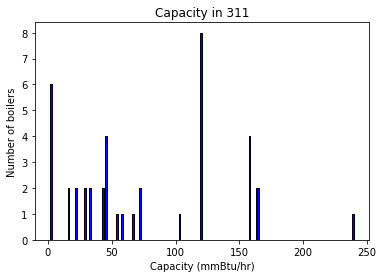

In [29]:
# matplotlib histogram
plt.hist(region_2_311['Input_Capacity'], color = 'blue', edgecolor = 'black',
         bins = int((max_value - min_value)/5))

# seaborn histogram
sns.distplot(region_2_311['Input_Capacity'], hist=True, kde=False, 
             bins=int((max_value - min_value)/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Capacity in 311')
plt.xlabel('Capacity (mmBtu/hr)')
plt.ylabel('Number of boilers')